In [62]:
import pandas as pd

# --- Load CSV safely ---
df = pd.read_csv('Validation_data_by_AR.csv')

# --- Display basic info ---
print("Dataset shape:", df.shape)

print("\nColumns:")
print(df.columns.tolist())

print("\nData types:")
print(df.dtypes)

# --- Optional: preview first few rows ---
print("\nSample rows:")
print(df.head())


Dataset shape: (95933, 32)

Columns:
['grad_mean', 'grad_std', 'grad_median', 'grad_min', 'grad_max', 'grad_skewness', 'grad_kurtosis', 'nl_length', 'nl_num_fragments', 'nl_grad_weighted_length', 'nl_curv_mean', 'nl_curv_std', 'nl_curv_median', 'nl_curv_min', 'nl_curv_max', 'nl_bend_energy_mean', 'nl_bend_energy_std', 'nl_bend_energy_median', 'nl_bend_energy_min', 'nl_bend_energy_max', 'wavelet_energy_1', 'wavelet_energy_2', 'wavelet_energy_3', 'wavelet_energy_4', 'wavelet_energy_5', 'flux_unsigned', 'flux_signed', 'flux_negative', 'flux_positive', 'class_label', 'flare_strength', 'image_path']

Data types:
grad_mean                  float64
grad_std                   float64
grad_median                float64
grad_min                   float64
grad_max                   float64
grad_skewness              float64
grad_kurtosis              float64
nl_length                  float64
nl_num_fragments           float64
nl_grad_weighted_length    float64
nl_curv_mean               float64


In [63]:
print("Dataset shape:", df.shape)
print("\nColumns:")
print(df.columns.tolist())

print("\nData types:")
display(df.dtypes)

Dataset shape: (95933, 32)

Columns:
['grad_mean', 'grad_std', 'grad_median', 'grad_min', 'grad_max', 'grad_skewness', 'grad_kurtosis', 'nl_length', 'nl_num_fragments', 'nl_grad_weighted_length', 'nl_curv_mean', 'nl_curv_std', 'nl_curv_median', 'nl_curv_min', 'nl_curv_max', 'nl_bend_energy_mean', 'nl_bend_energy_std', 'nl_bend_energy_median', 'nl_bend_energy_min', 'nl_bend_energy_max', 'wavelet_energy_1', 'wavelet_energy_2', 'wavelet_energy_3', 'wavelet_energy_4', 'wavelet_energy_5', 'flux_unsigned', 'flux_signed', 'flux_negative', 'flux_positive', 'class_label', 'flare_strength', 'image_path']

Data types:


,0
grad_mean,float64
grad_std,float64
grad_median,float64
grad_min,float64
grad_max,float64
grad_skewness,float64
grad_kurtosis,float64
nl_length,float64
nl_num_fragments,float64
nl_grad_weighted_length,float64


/tmp/ipython-input-423893879.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


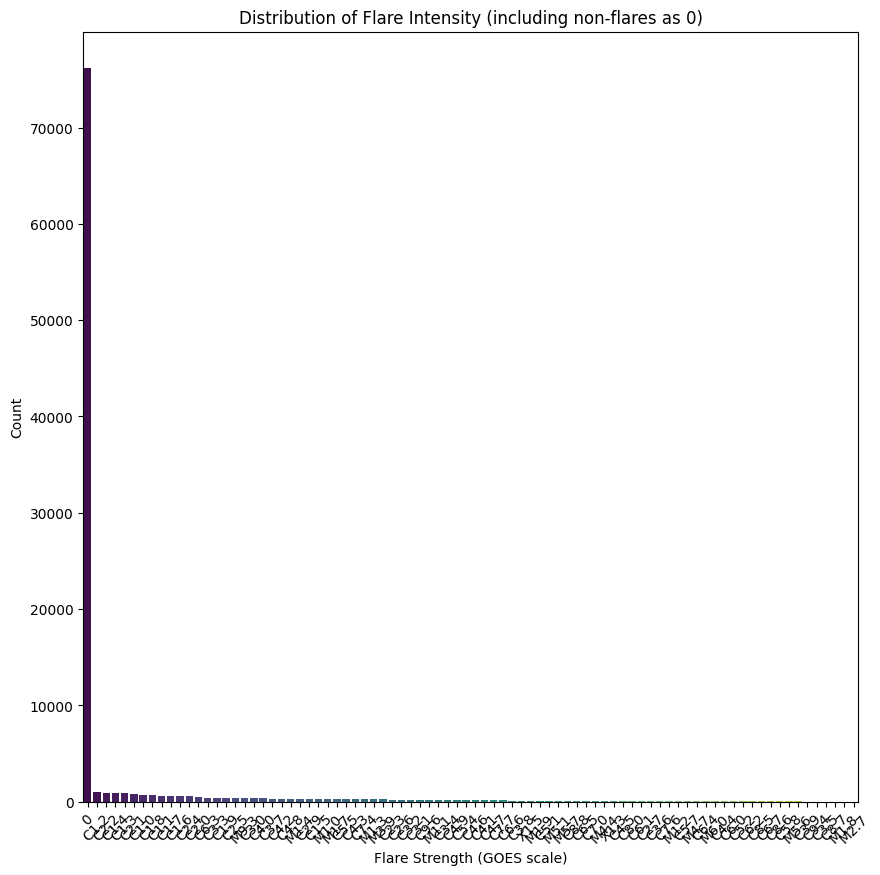

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.countplot(
    x=df['flare_strength'],
    order=df['flare_strength'].value_counts().index,
    palette='viridis'
)
plt.title("Distribution of Flare Intensity (including non-flares as 0)")
plt.xlabel("Flare Strength (GOES scale)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-1306885658.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='flare_group',


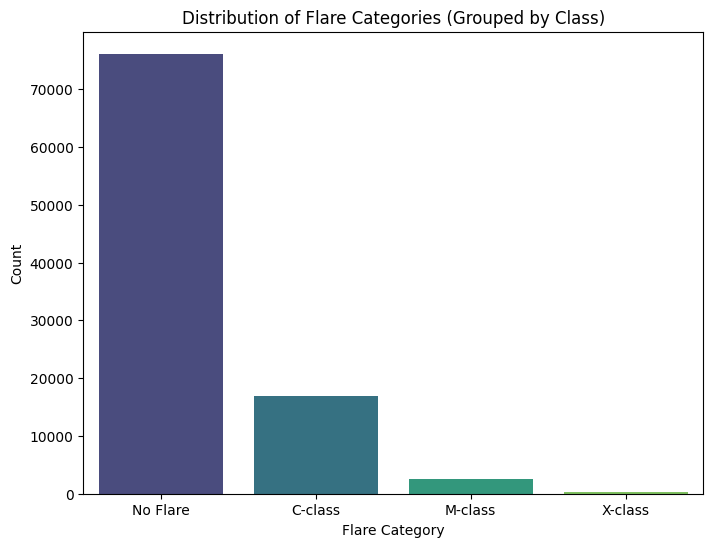

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Map detailed flare strengths into broader classes
def group_flare_class(flare):
    if flare == '0':
        return 'No Flare'
    elif flare.startswith('C'):
        return 'C-class'
    elif flare.startswith('M'):
        return 'M-class'
    elif flare.startswith('X'):
        return 'X-class'
    else:
        return 'Other'

df['flare_group'] = df['flare_strength'].astype(str).apply(group_flare_class)

# Countplot for grouped flare categories
plt.figure(figsize=(8,6))
sns.countplot(x='flare_group',
              data=df,
              order=['No Flare','C-class','M-class','X-class'],
              palette='viridis')

plt.title("Distribution of Flare Categories (Grouped by Class)")
plt.xlabel("Flare Category")
plt.ylabel("Count")
plt.show()


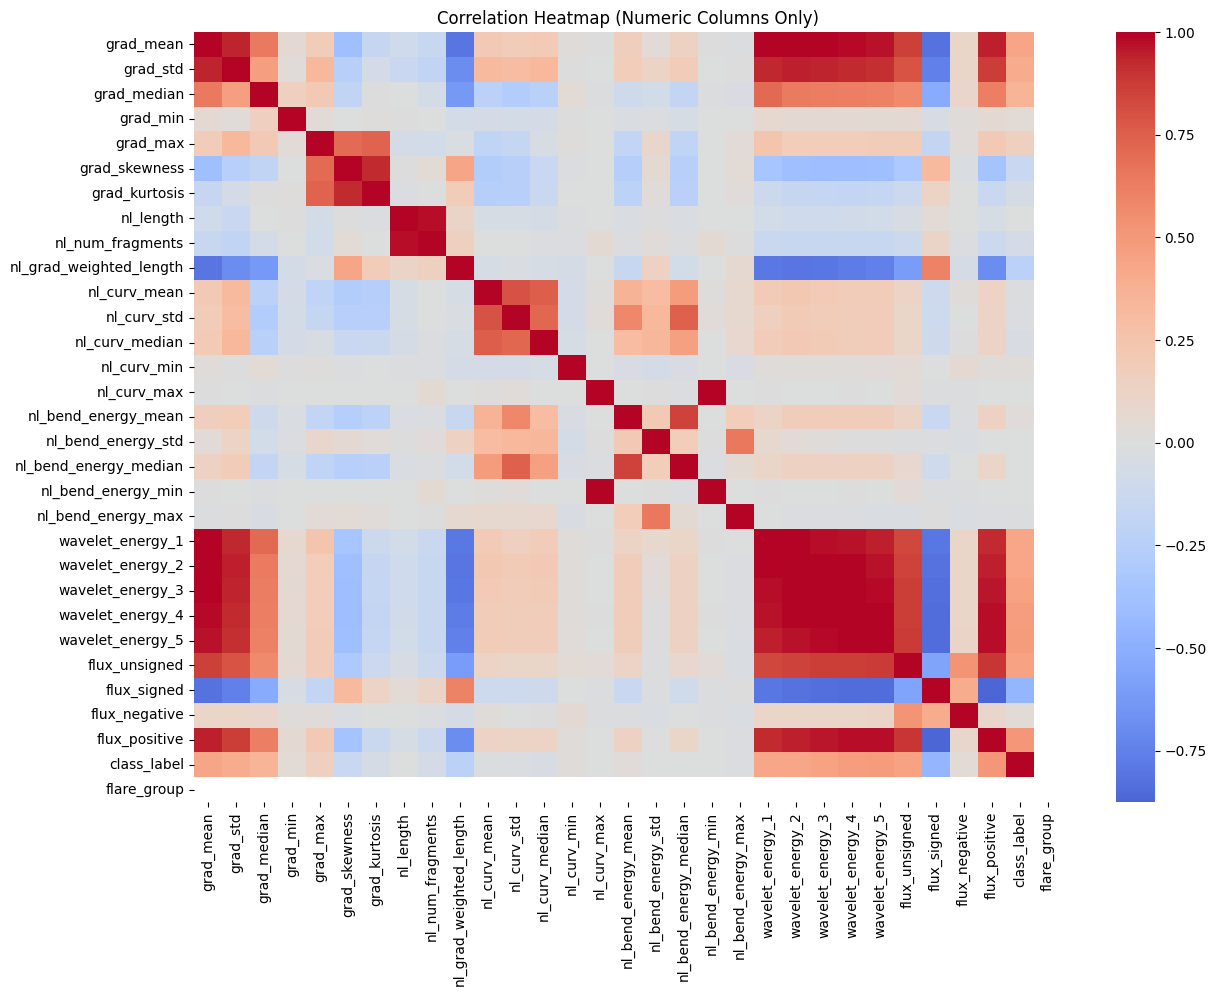

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

corr = numeric_df.corr()

plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()


Number of numeric columns: 30


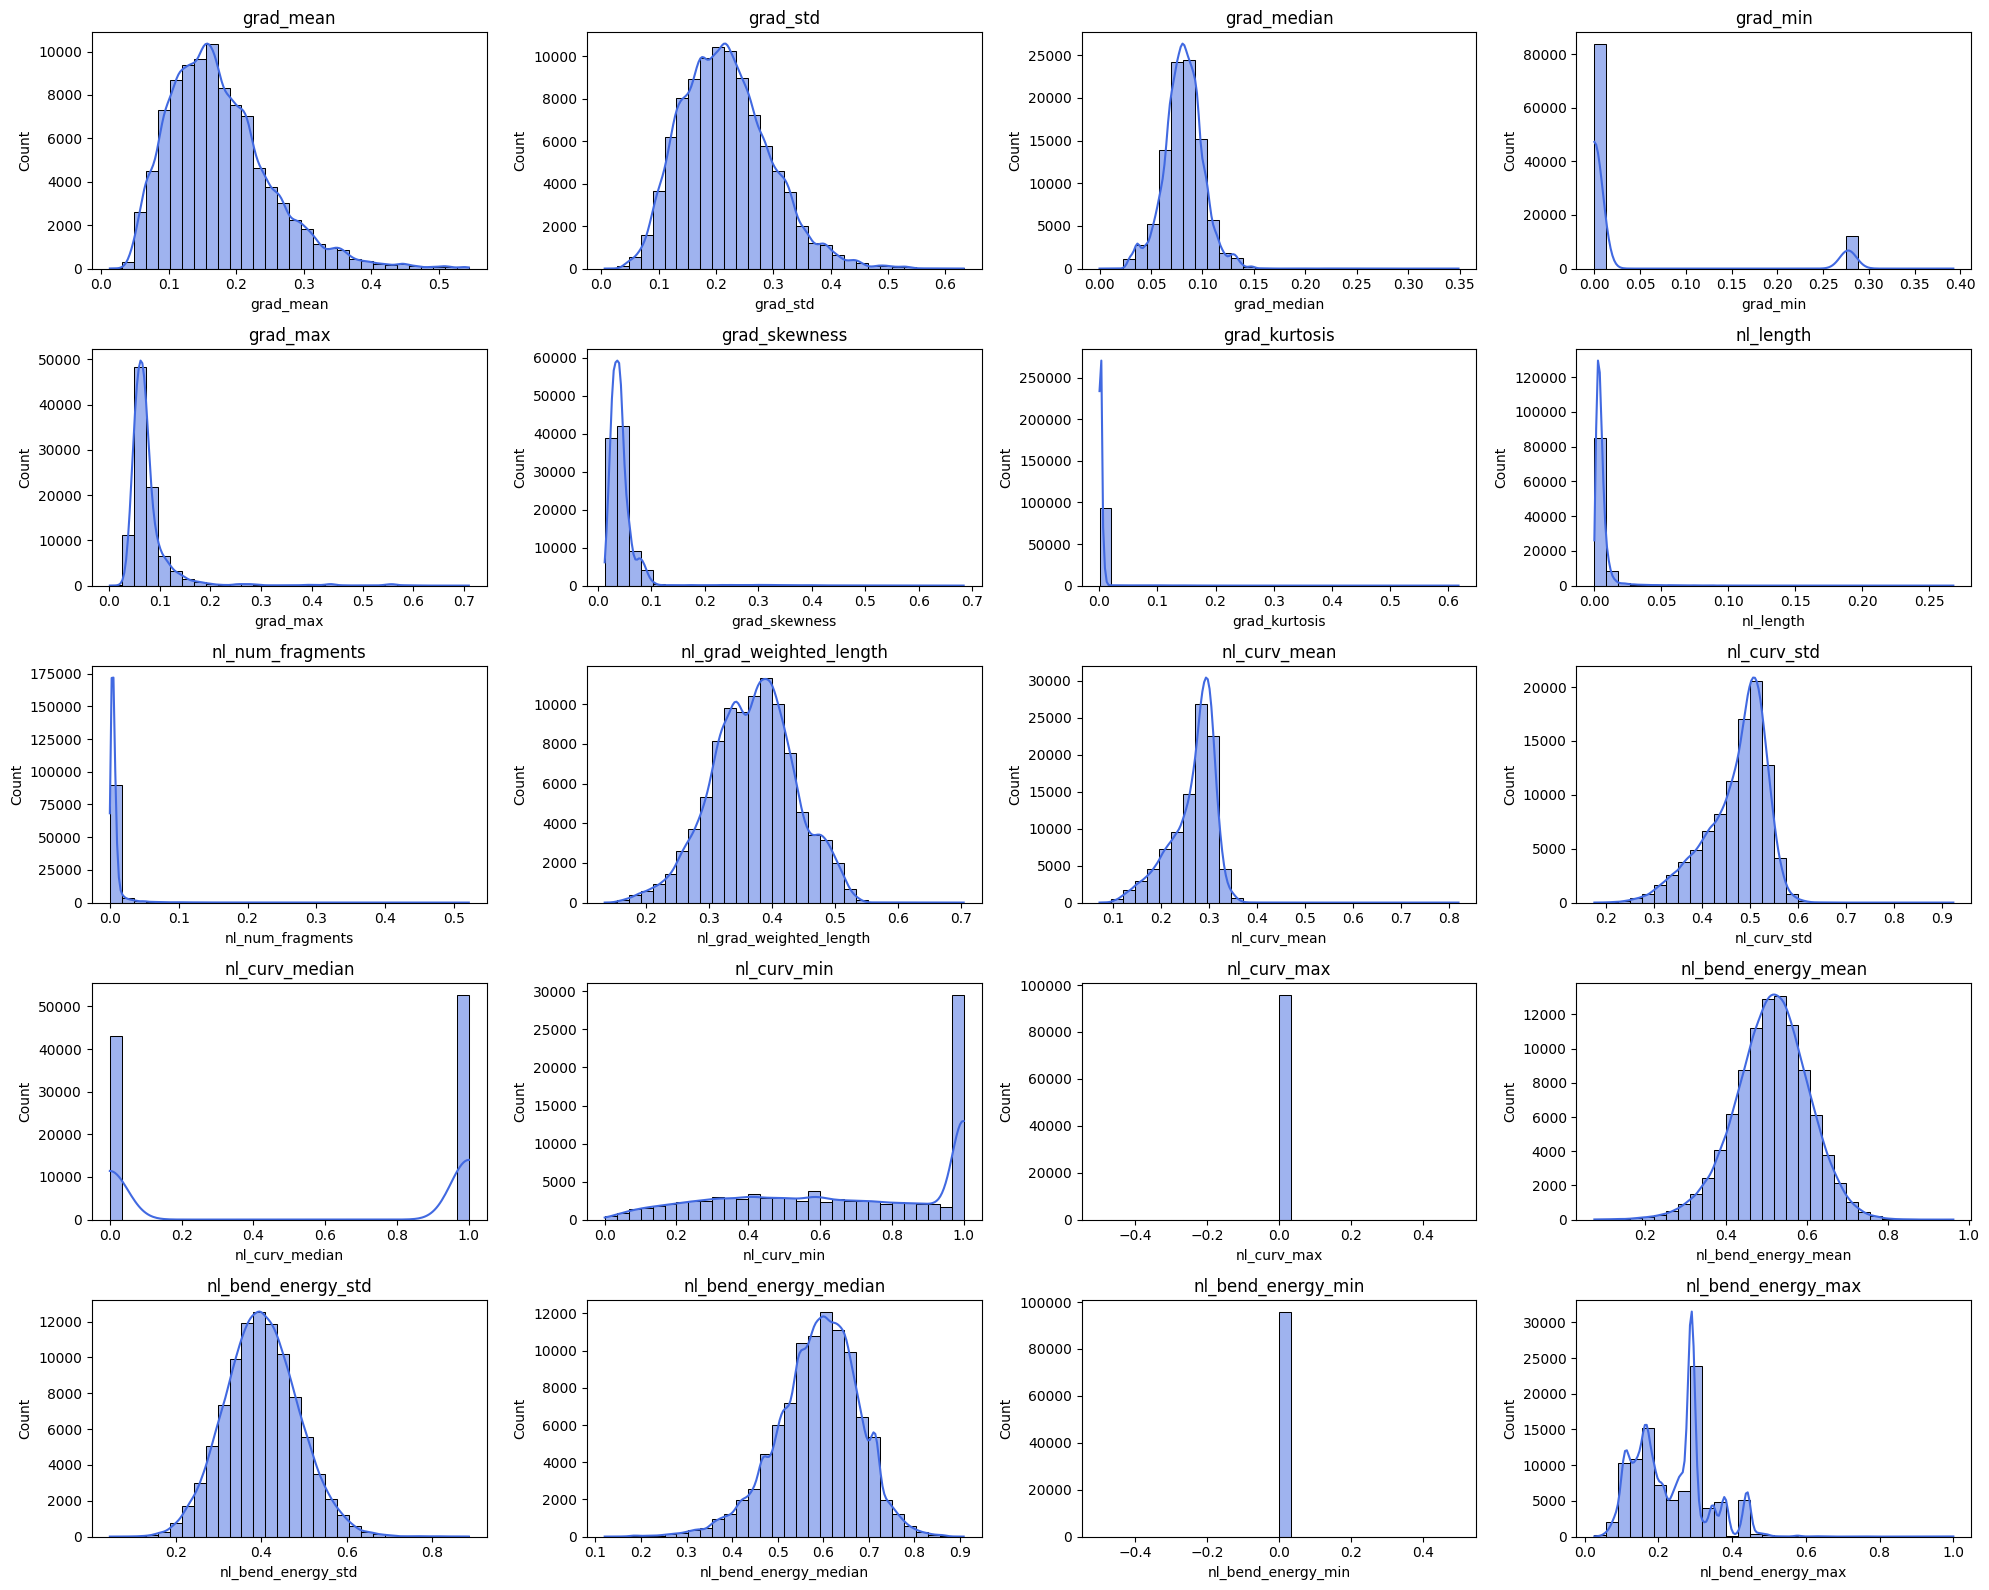

<Figure size 1500x800 with 0 Axes>

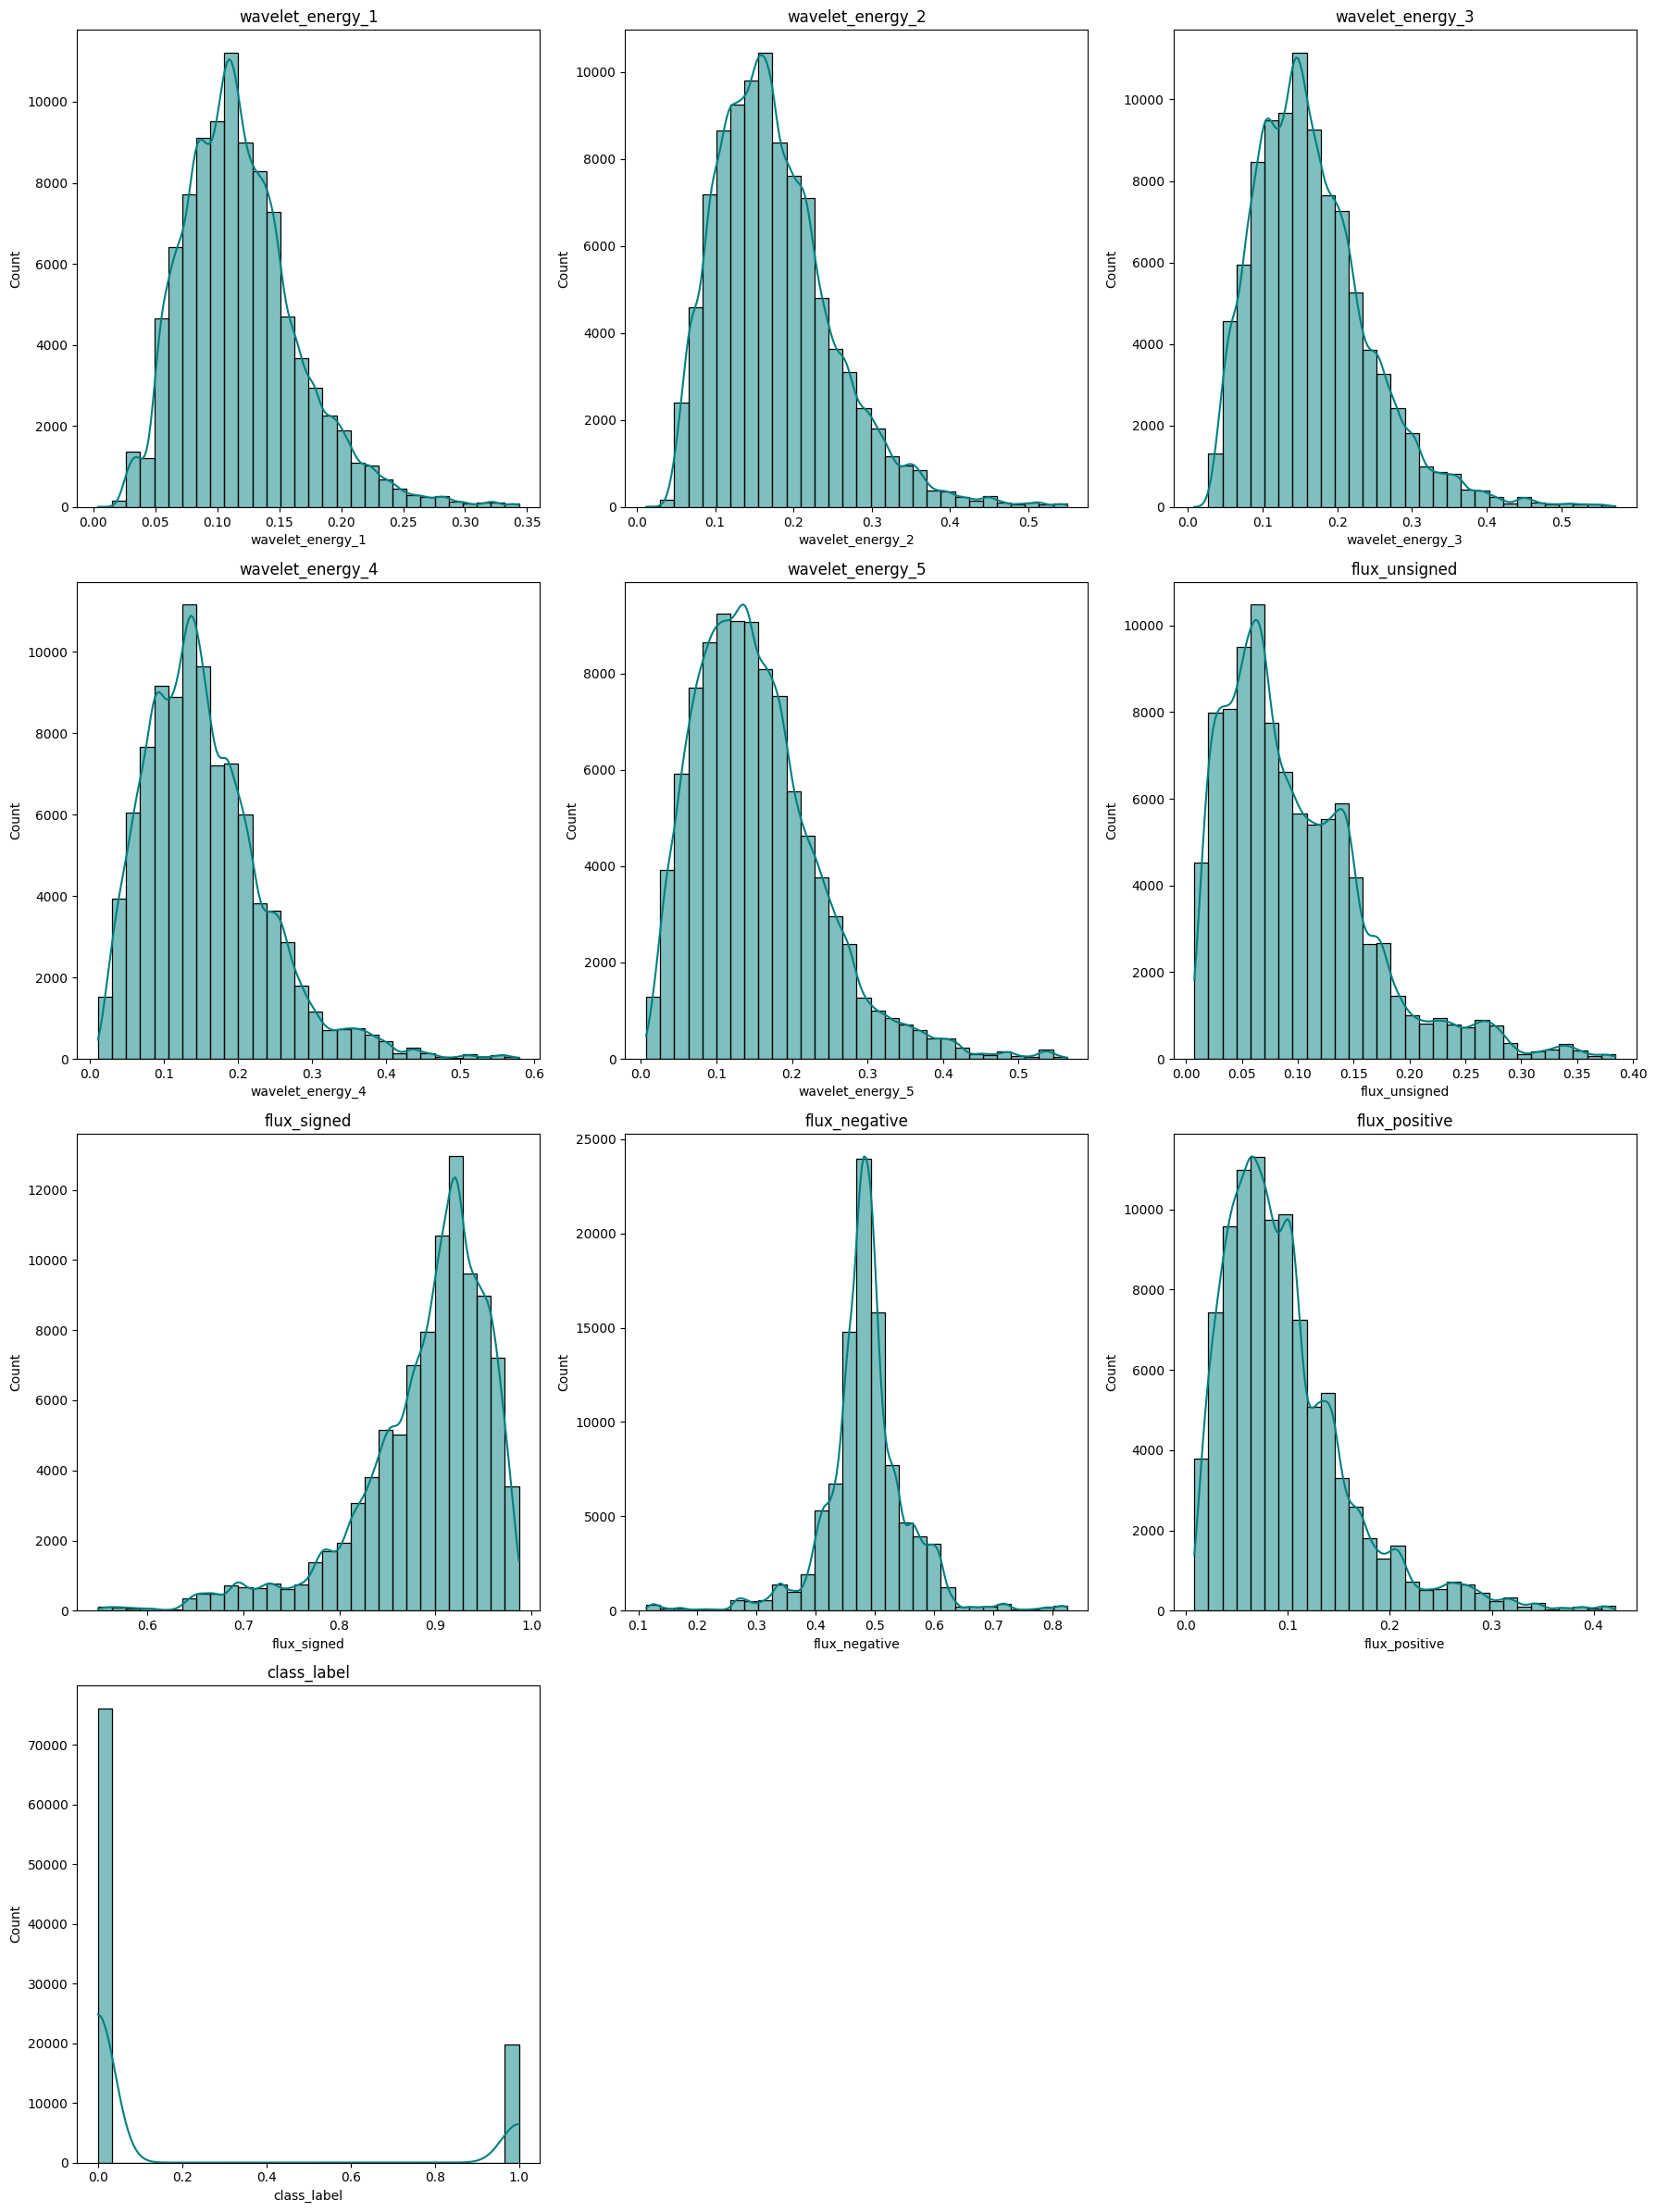

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select only numeric columns (skip flare_strength, image_path, etc.)
X = df.select_dtypes(include=[np.number])

# Confirm how many numeric columns we have
print("Number of numeric columns:", len(X.columns))

# First 20 numeric columns
plt.figure(figsize=(20,16))
for i, col in enumerate(X.columns[:20], 1):
    plt.subplot(5, 4, i)
    sns.histplot(data=X, x=col, bins=30, kde=True, color='royalblue')
    plt.title(col)
plt.tight_layout()
plt.show()

# Remaining numeric columns
plt.figure(figsize=(15,8))
remaining_cols = X.columns[20:]
rows = int(np.ceil(len(remaining_cols)/3))
plt.figure(figsize=(18, 6 * rows))
for i, col in enumerate(remaining_cols, 1):
    plt.subplot(rows, 3, i)
    sns.histplot(data=X, x=col, bins=30, kde=True, color='teal')
    plt.title(col)
plt.tight_layout()
plt.show()


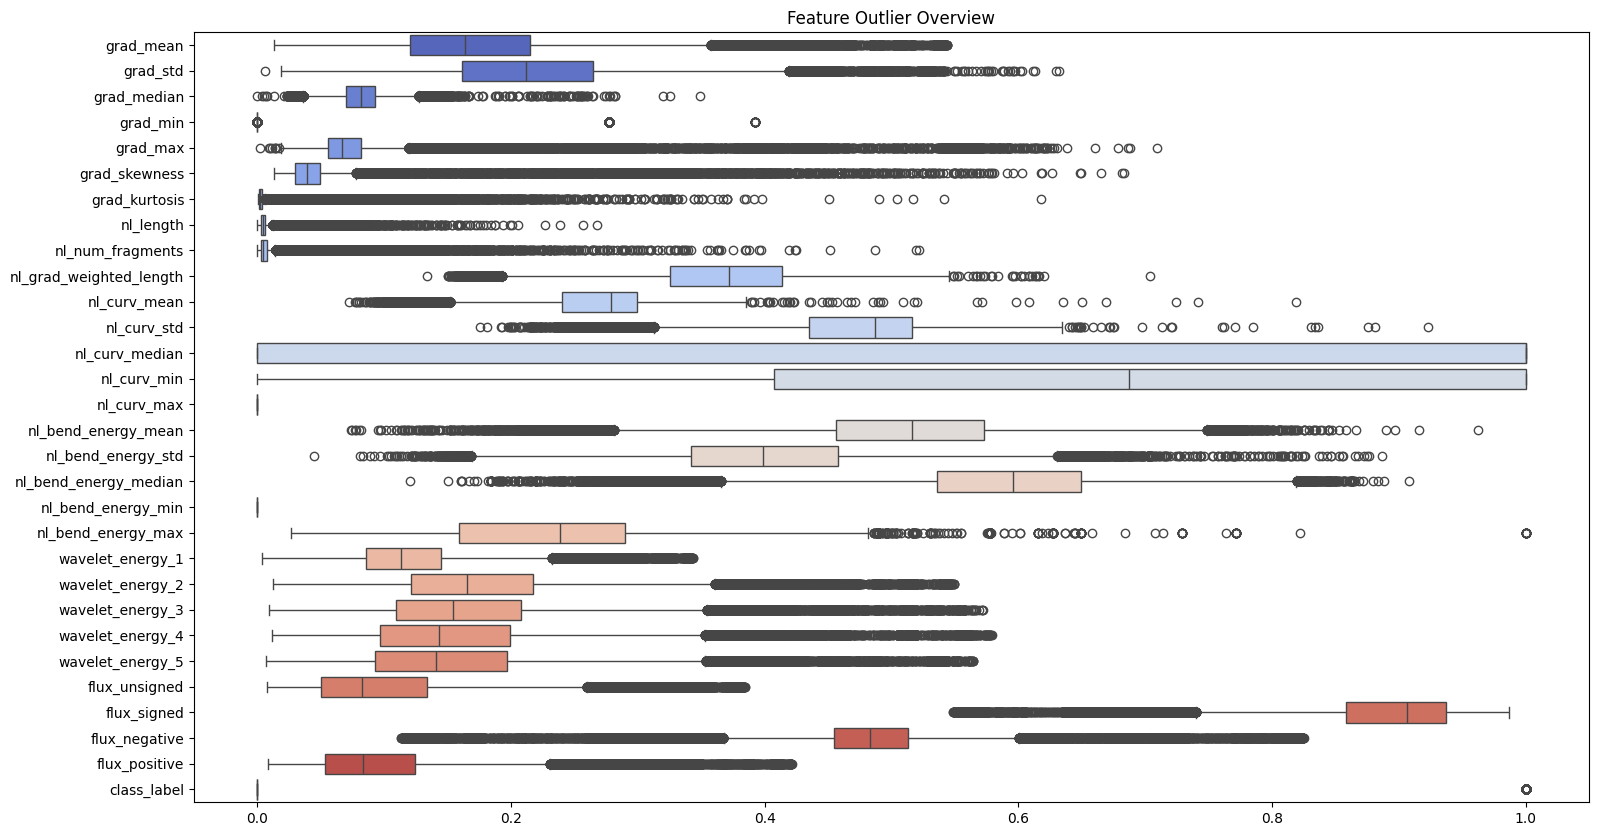

In [70]:
plt.figure(figsize=(18,10))
sns.boxplot(data=X, orient='h', palette='coolwarm', linewidth=1)
plt.title("Feature Outlier Overview")
plt.show()


Plotting 29 numeric features grouped by flare class...


/tmp/ipython-input-1677774503.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='flare_group', y=col, palette='coolwarm', showfliers=True)
/tmp/ipython-input-1677774503.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='flare_group', y=col, palette='coolwarm', showfliers=True)
/tmp/ipython-input-1677774503.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='flare_group', y=col, palette='coolwarm', showfliers=True)
/tmp/ipython-input-1677774503.py:36: FutureWarning: 

Passing `palette` without assignin

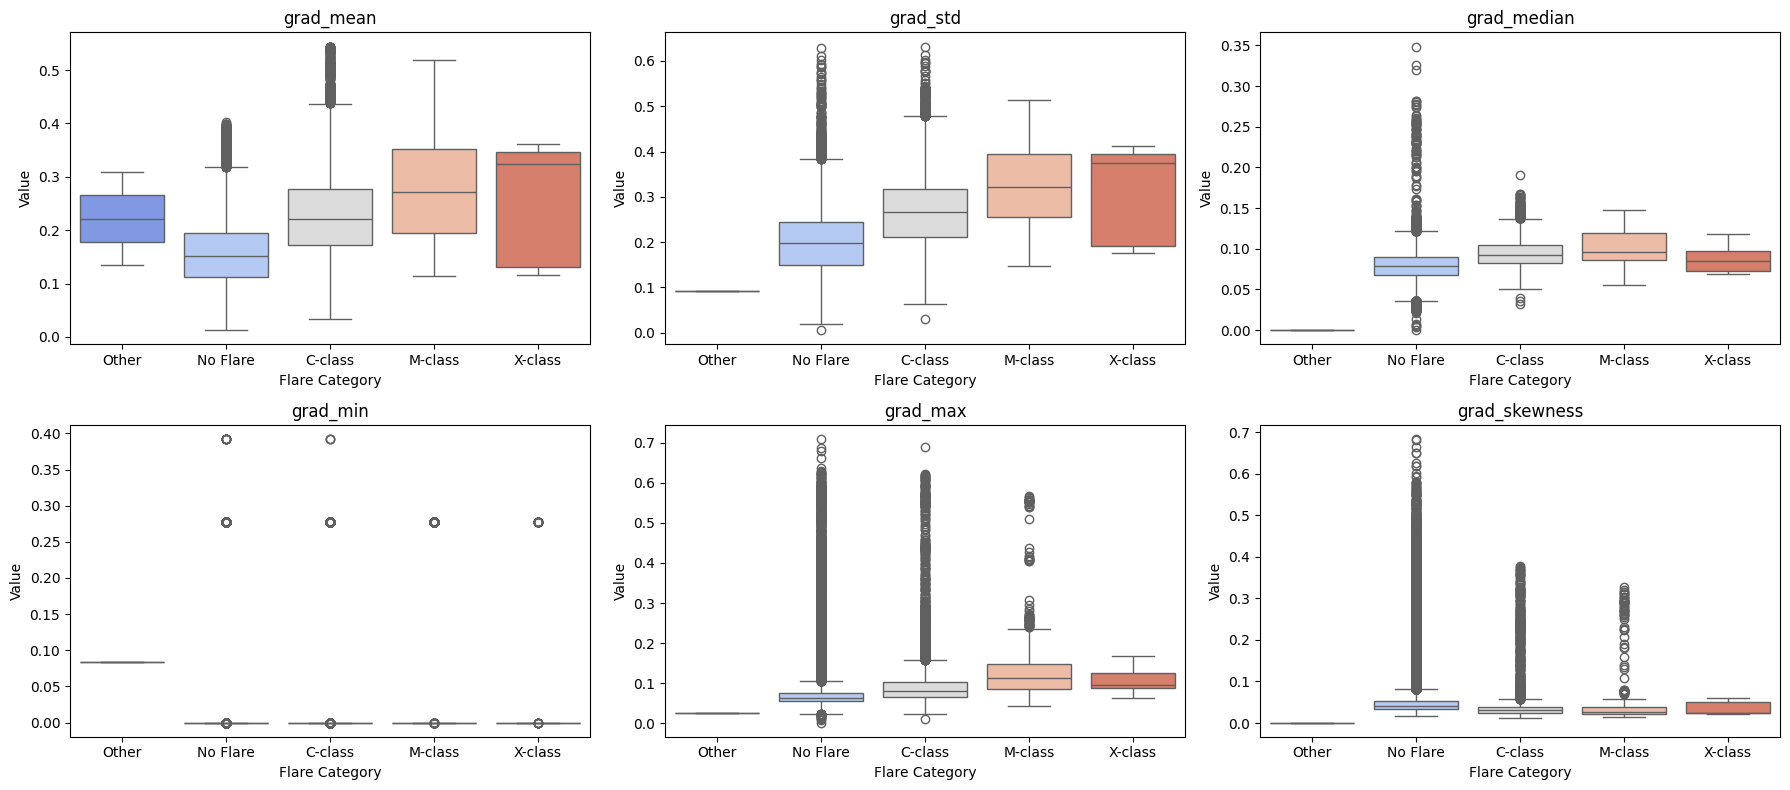

/tmp/ipython-input-1677774503.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='flare_group', y=col, palette='coolwarm', showfliers=True)
/tmp/ipython-input-1677774503.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='flare_group', y=col, palette='coolwarm', showfliers=True)
/tmp/ipython-input-1677774503.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='flare_group', y=col, palette='coolwarm', showfliers=True)
/tmp/ipython-input-1677774503.py:36: FutureWarning: 

Passing `palette` without assignin

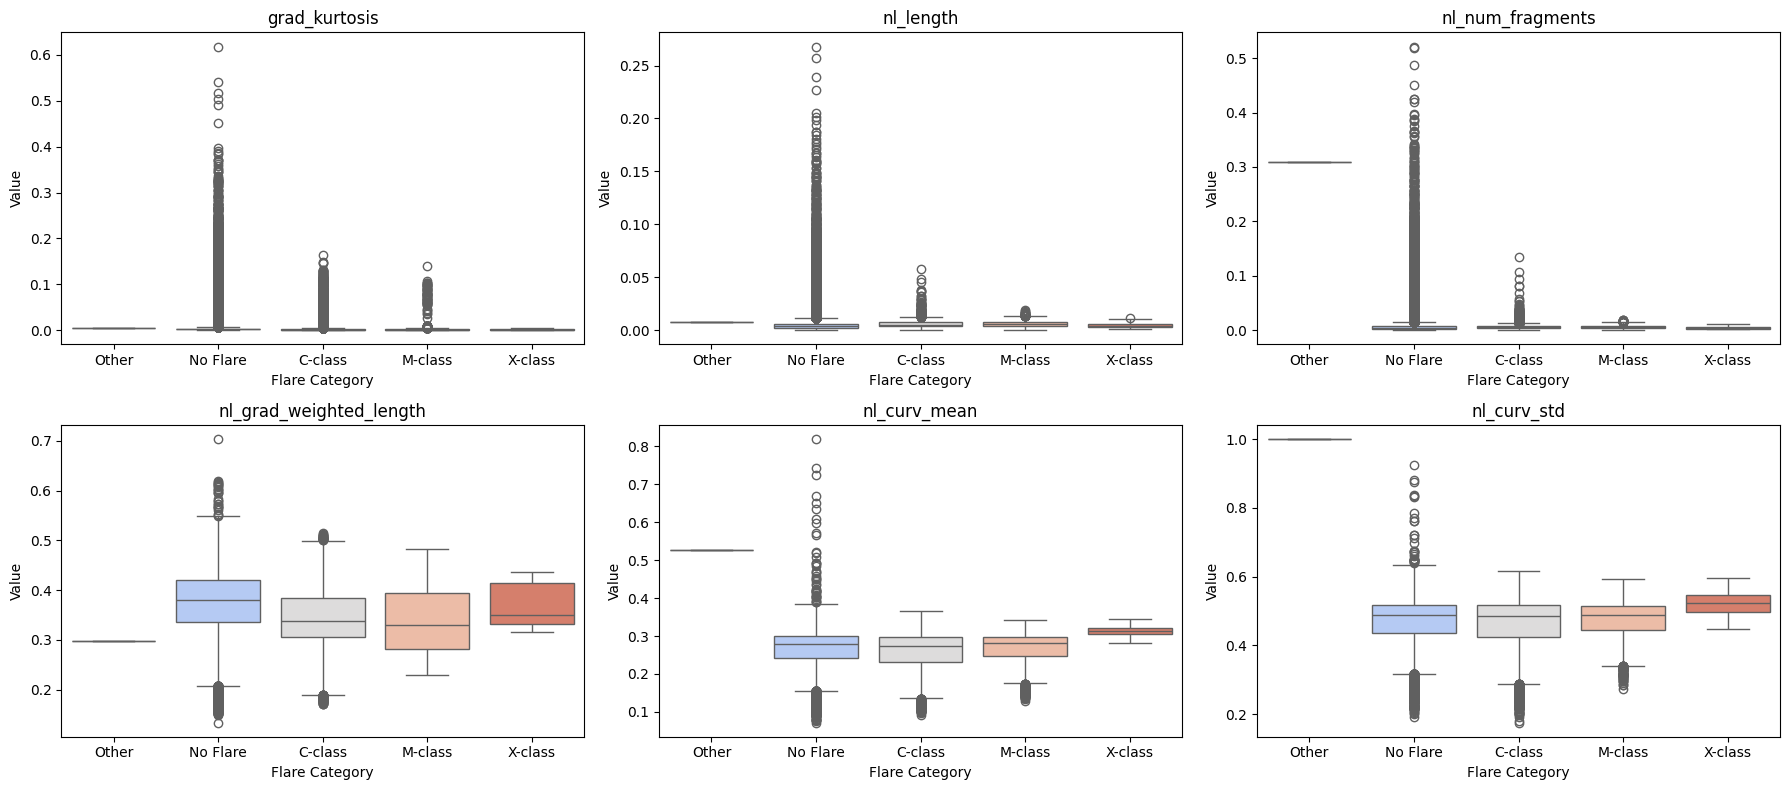

/tmp/ipython-input-1677774503.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='flare_group', y=col, palette='coolwarm', showfliers=True)
/tmp/ipython-input-1677774503.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='flare_group', y=col, palette='coolwarm', showfliers=True)
/tmp/ipython-input-1677774503.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='flare_group', y=col, palette='coolwarm', showfliers=True)
/tmp/ipython-input-1677774503.py:36: FutureWarning: 

Passing `palette` without assignin

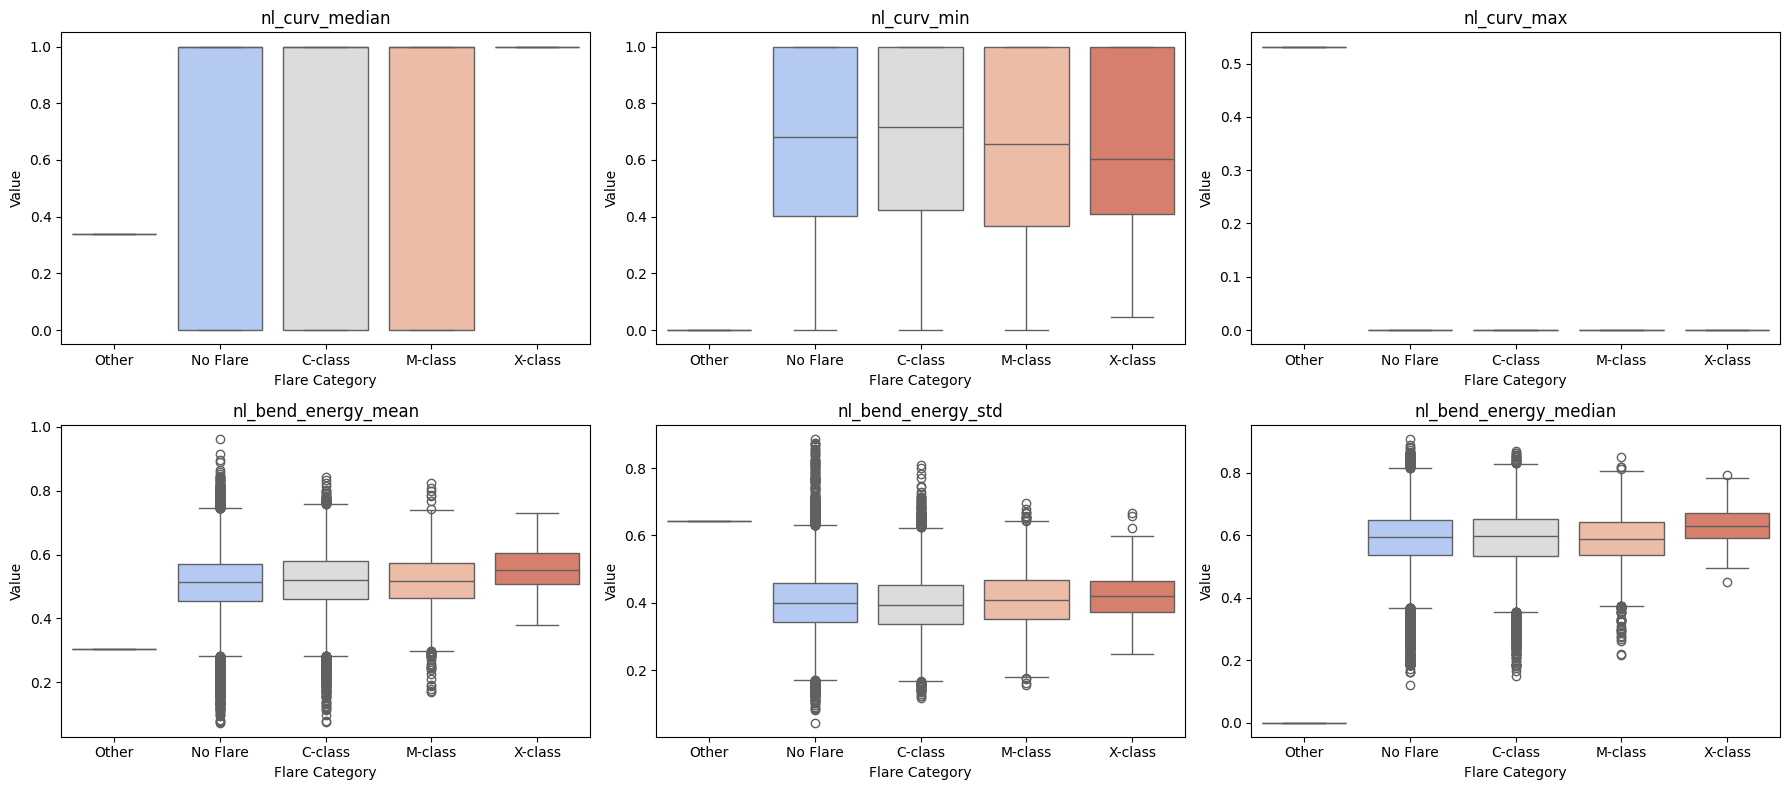

/tmp/ipython-input-1677774503.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='flare_group', y=col, palette='coolwarm', showfliers=True)
/tmp/ipython-input-1677774503.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='flare_group', y=col, palette='coolwarm', showfliers=True)
/tmp/ipython-input-1677774503.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='flare_group', y=col, palette='coolwarm', showfliers=True)
/tmp/ipython-input-1677774503.py:36: FutureWarning: 

Passing `palette` without assignin

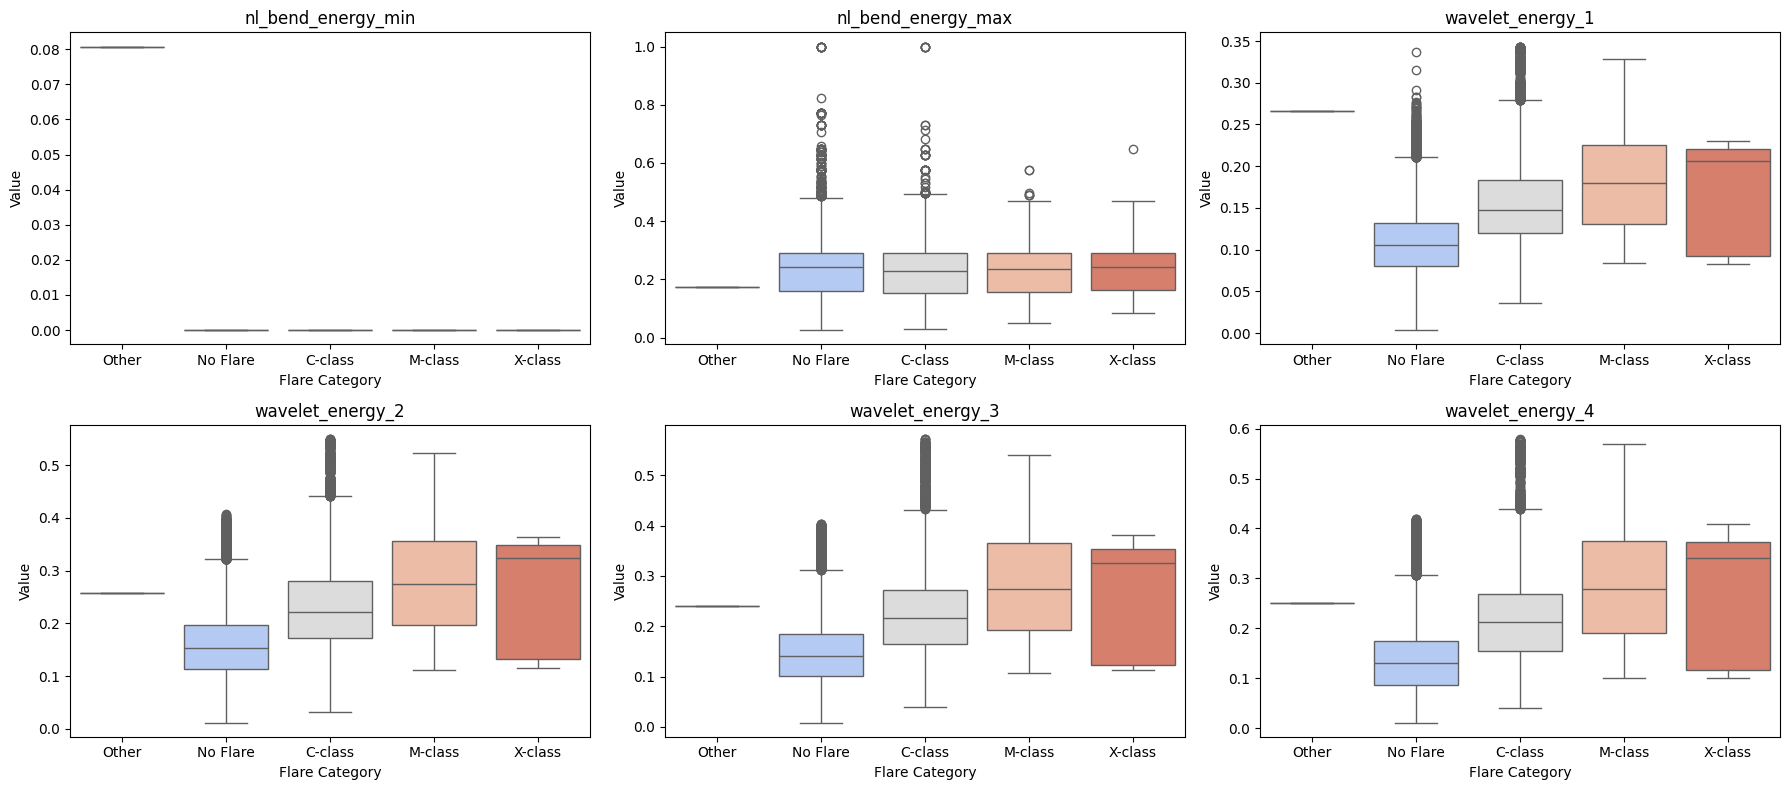

/tmp/ipython-input-1677774503.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='flare_group', y=col, palette='coolwarm', showfliers=True)
/tmp/ipython-input-1677774503.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='flare_group', y=col, palette='coolwarm', showfliers=True)
/tmp/ipython-input-1677774503.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='flare_group', y=col, palette='coolwarm', showfliers=True)
/tmp/ipython-input-1677774503.py:36: FutureWarning: 

Passing `palette` without assignin

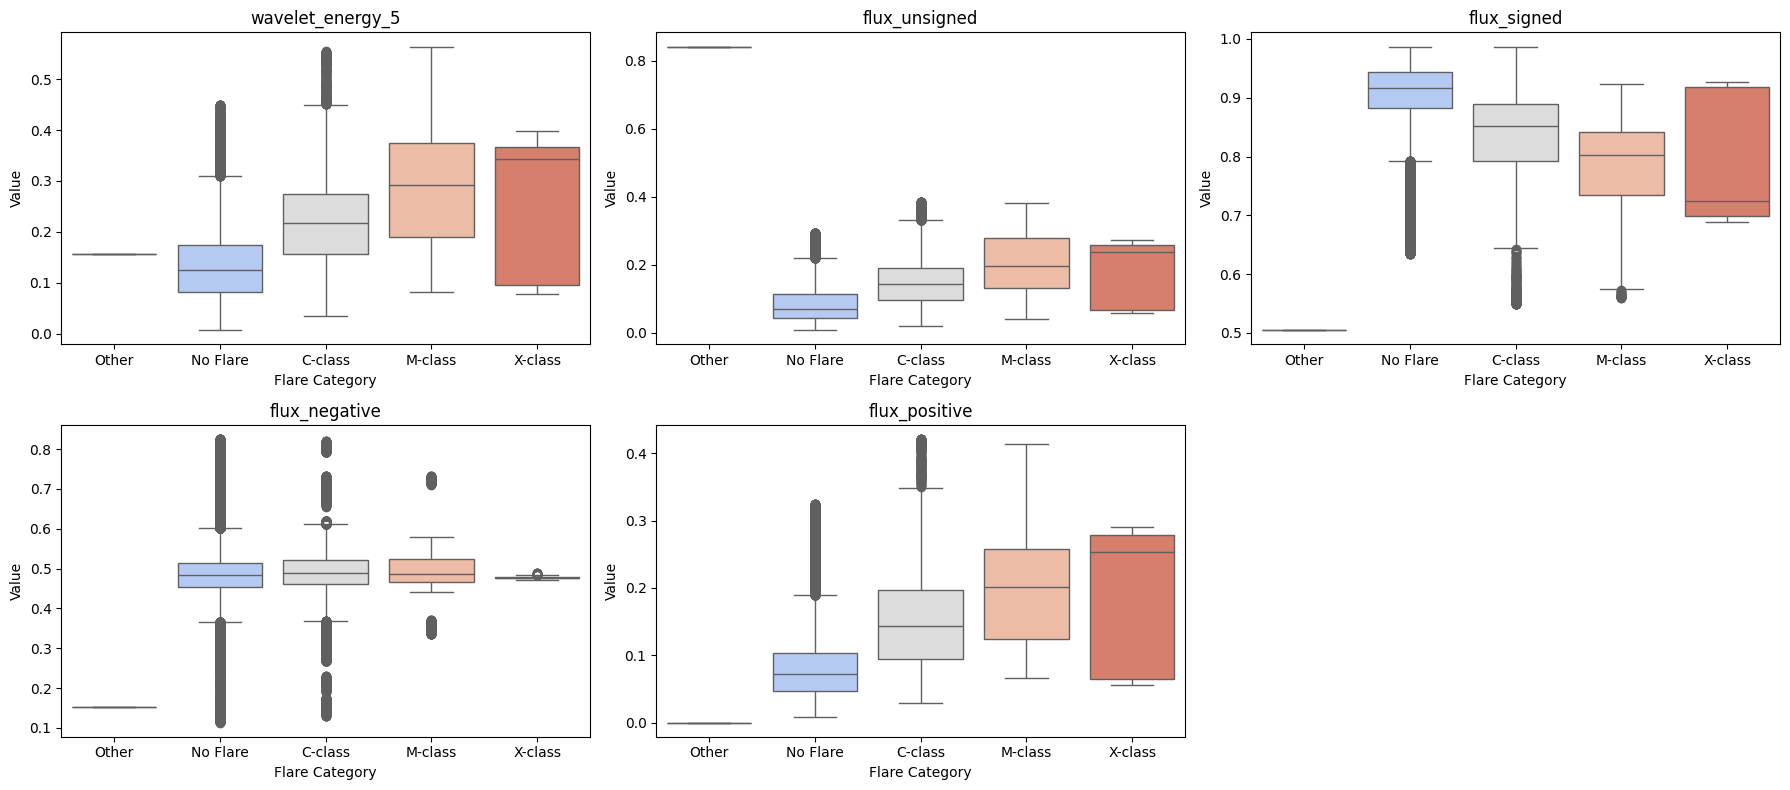

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Ensure grouped target
def group_flare_class(f):
    f = str(f)
    if f == '0': return 'No Flare'
    if f.startswith('C'): return 'C-class'
    if f.startswith('M'): return 'M-class'
    if f.startswith('X'): return 'X-class'
    return 'Other'

if 'flare_group' not in df.columns:
    df['flare_group'] = df['flare_strength'].apply(group_flare_class)

# 2) Pick ALL numeric features, exclude targets if present
exclude = {'class_label', 'flare_numeric'}  # add more here if needed
num_df = df.select_dtypes(include=[np.number])
feature_cols = [c for c in num_df.columns if c not in exclude]

print(f"Plotting {len(feature_cols)} numeric features grouped by flare class...")

# 3) Plot in batches for readability
batch_size = 6          # 6 plots per figure
n_batches = int(np.ceil(len(feature_cols) / batch_size))

for b in range(n_batches):
    cols = feature_cols[b*batch_size : (b+1)*batch_size]
    n = len(cols)
    rows = 2
    cols_per_row = 3
    plt.figure(figsize=(18, 8))
    for i, col in enumerate(cols, 1):
        plt.subplot(rows, cols_per_row, i)
        sns.boxplot(data=df, x='flare_group', y=col, palette='coolwarm', showfliers=True)
        plt.title(col)
        plt.xlabel('Flare Category')
        plt.ylabel('Value')
        plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


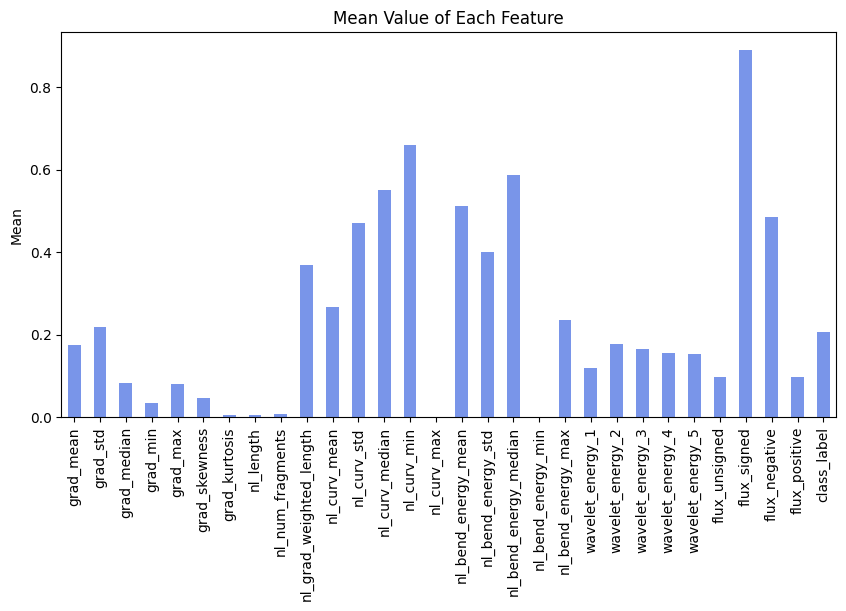

In [73]:
import matplotlib.pyplot as plt

means = df.select_dtypes('number').mean()
stds = df.select_dtypes('number').std()

plt.figure(figsize=(10,5))
means.plot(kind='bar', color='royalblue', alpha=0.7)
plt.title("Mean Value of Each Feature")
plt.ylabel("Mean")
plt.show()



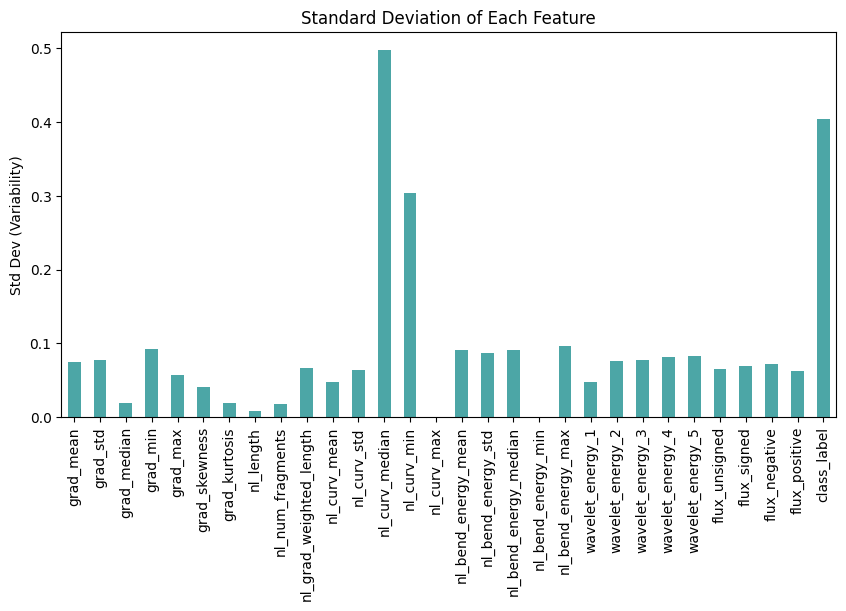

In [74]:

plt.figure(figsize=(10,5))
stds.plot(kind='bar', color='teal', alpha=0.7)
plt.title("Standard Deviation of Each Feature")
plt.ylabel("Std Dev (Variability)")
plt.show()

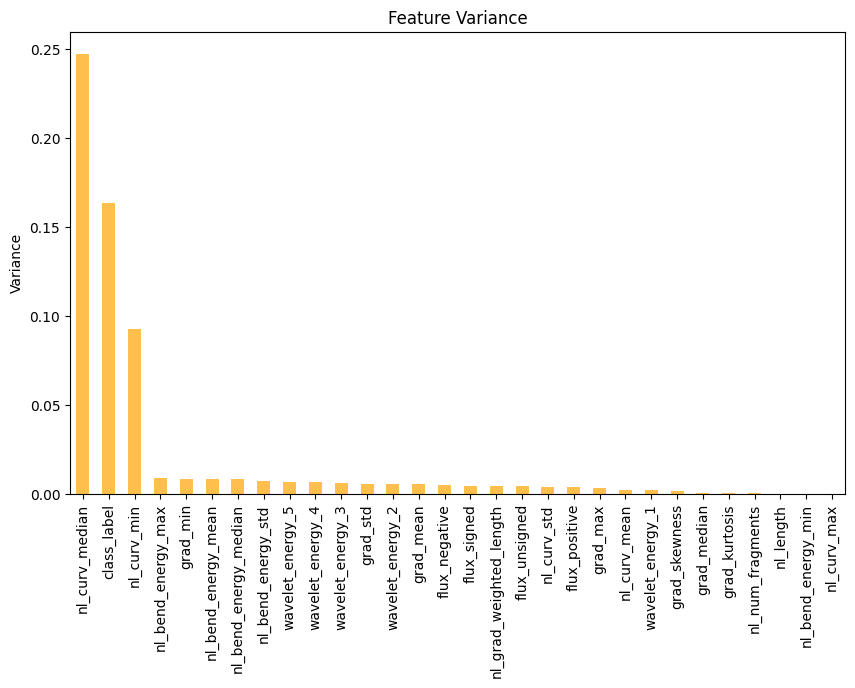

In [75]:
variance = df.select_dtypes('number').var().sort_values(ascending=False)
plt.figure(figsize=(10,6))
variance.plot(kind='bar', color='orange', alpha=0.7)
plt.title("Feature Variance")
plt.ylabel("Variance")
plt.show()


In [79]:
import numpy as np

# Create numeric encoding for flare strength
def flare_to_num(s):
    s = str(s)
    if s == '0':
        return 0
    elif s.startswith('C'):
        return 1
    elif s.startswith('M'):
        return 2
    elif s.startswith('X'):
        return 3
    else:
        return np.nan

df['flare_numeric'] = df['flare_strength'].apply(flare_to_num)
print(df['flare_numeric'].value_counts(dropna=False))


flare_numeric
0    76142
1    16975
2     2578
3      238
Name: count, dtype: int64


/tmp/ipython-input-3087802171.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corrs.values, y=corrs.index, palette='coolwarm')


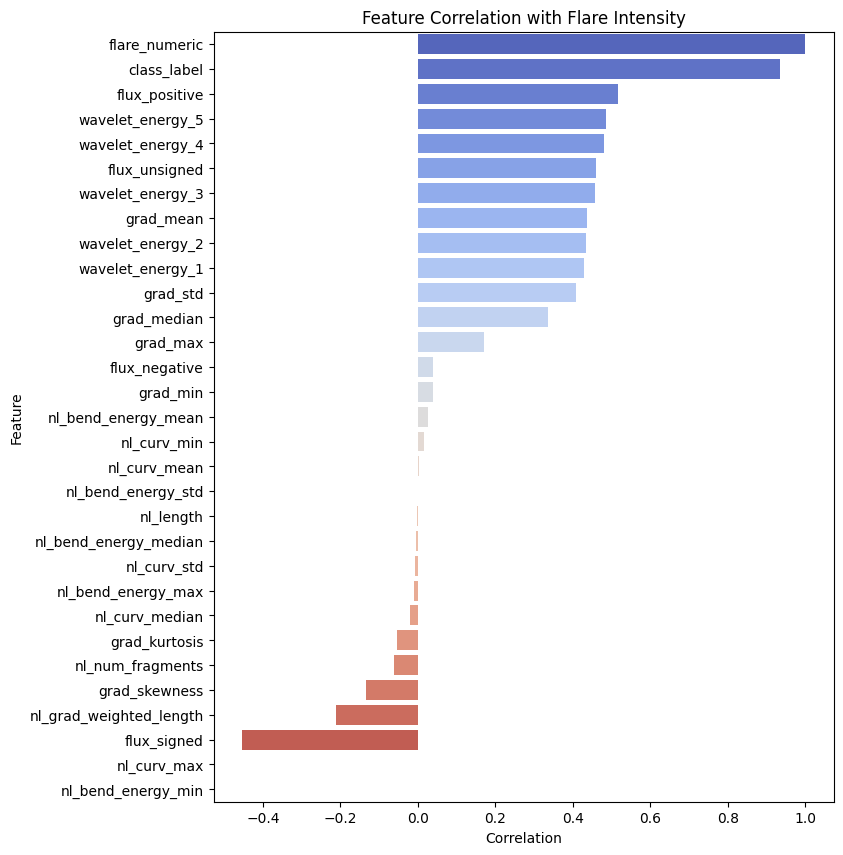

In [81]:
import numpy as np

numeric_df = df.select_dtypes(include=[np.number])
corrs = numeric_df.corr()['flare_numeric'].sort_values(ascending=False)

plt.figure(figsize=(8,10))
sns.barplot(x=corrs.values, y=corrs.index, palette='coolwarm')
plt.title("Feature Correlation with Flare Intensity")
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.show()


/tmp/ipython-input-2005584883.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mi_series.values, y=mi_series.index, palette='mako')


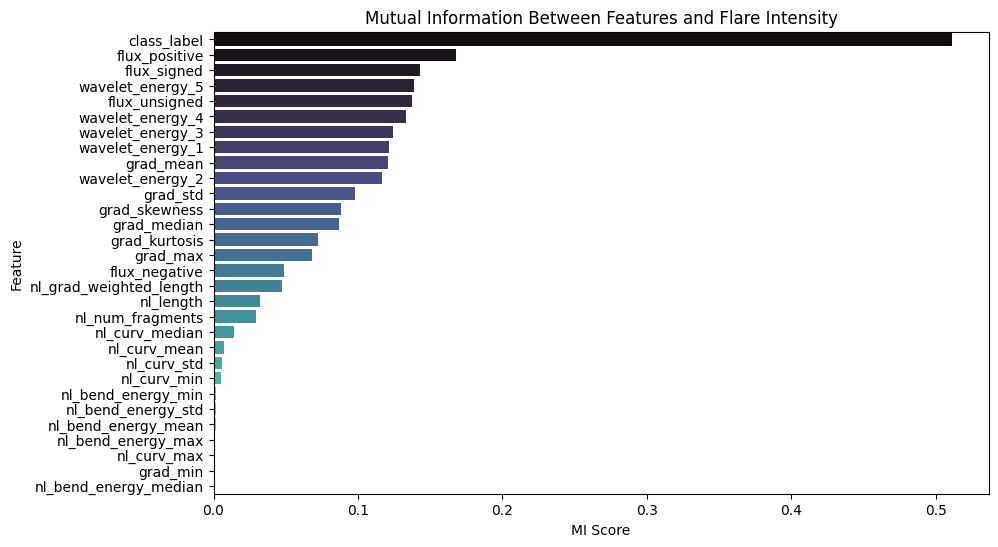

In [83]:
from sklearn.feature_selection import mutual_info_classif

X = df.select_dtypes('number').drop(columns=['flare_numeric'], errors='ignore')
y = df['flare_numeric']

mi = mutual_info_classif(X.fillna(0), y, random_state=42)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=mi_series.values, y=mi_series.index, palette='mako')
plt.title("Mutual Information Between Features and Flare Intensity")
plt.xlabel("MI Score")
plt.ylabel("Feature")
plt.show()
